# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

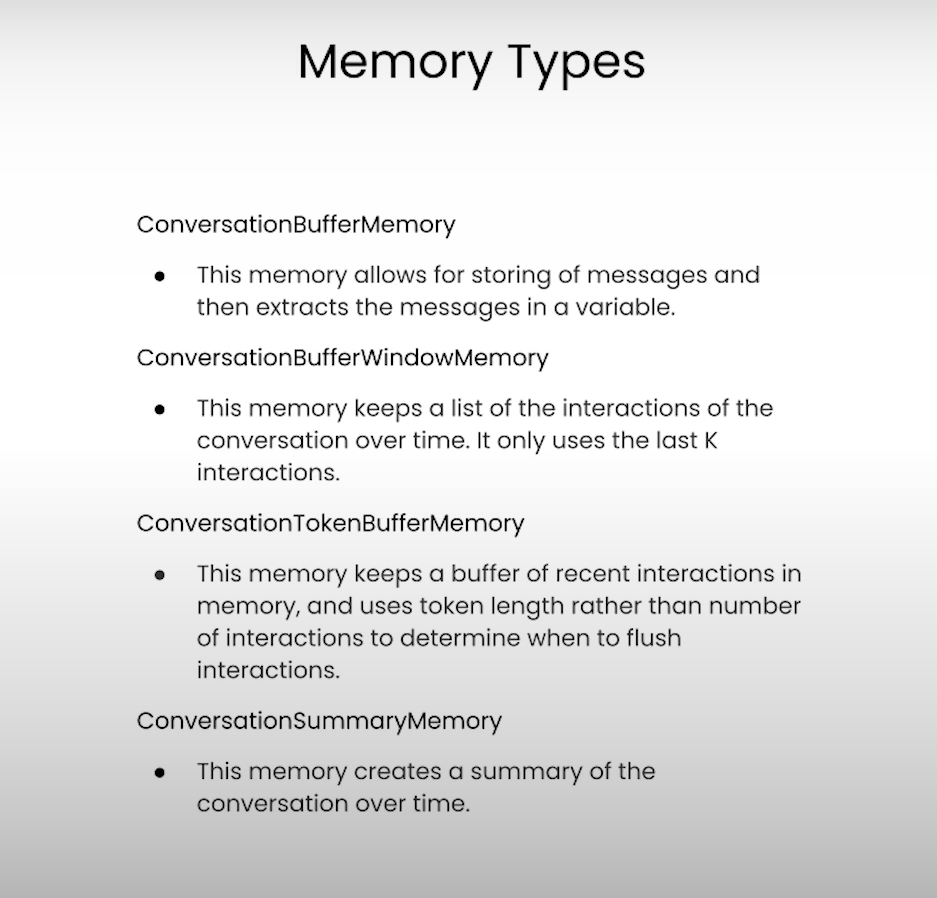

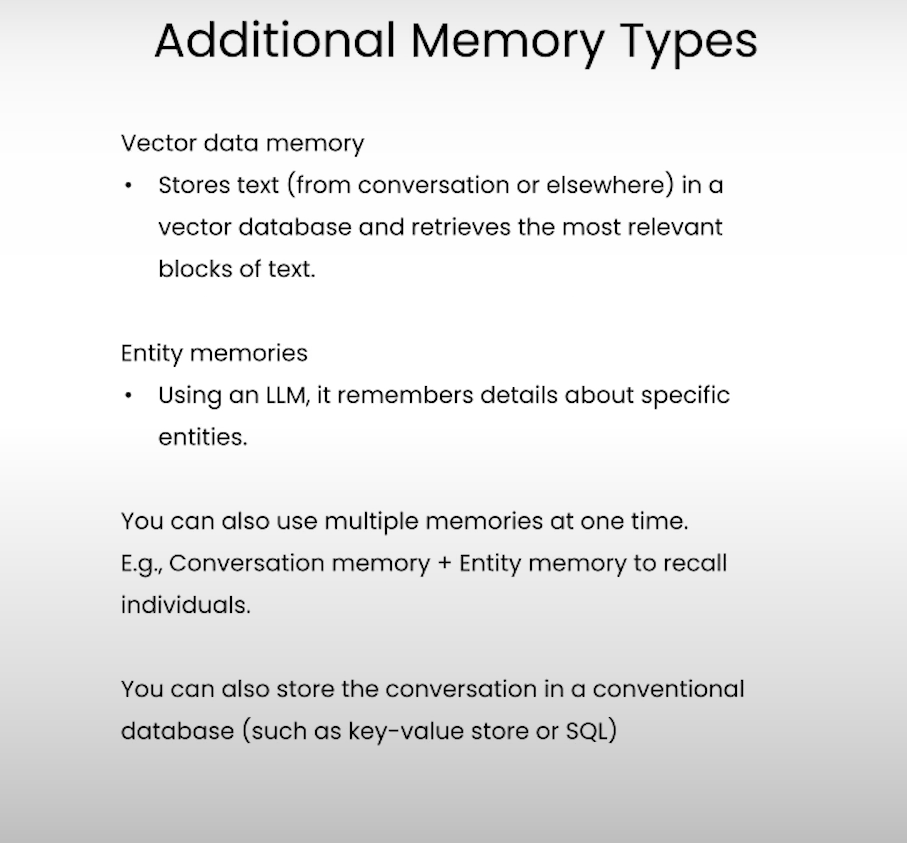

## ConversationBufferMemory

In [1]:
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

import warnings
warnings.filterwarnings('ignore')

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [2]:
# account for deprecation of LLM model
import datetime
# Get the current date
current_date = datetime.datetime.now().date()

# Define the date after which the model should be set to "gpt-3.5-turbo"
target_date = datetime.date(2024, 6, 12)

# Set the model variable based on the current date
if current_date > target_date:
    llm_model = "gpt-3.5-turbo"
else:
    llm_model = "gpt-3.5-turbo-0301"

In [3]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory


In [6]:
llm = ChatOpenAI(temperature=0.0, model=llm_model)
memory = ConversationBufferMemory()
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
) #we can set verbose = False to have only the content as output

In [7]:
conversation.predict(input="Hi, my name is Andrew")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, my name is Andrew
AI:

> Finished chain.


"Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?"

In [8]:
conversation.predict(input="What is 1+1?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI:

> Finished chain.


'The answer to 1+1 is 2.'

In [9]:
conversation.predict(input="What is my name?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI: The answer to 1+1 is 2.
Human: What is my name?
AI:

> Finished chain.


'Your name is Andrew, as you mentioned earlier.'

In [10]:
print(memory.buffer)

Human: Hi, my name is Andrew
AI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?
Human: What is 1+1?
AI: The answer to 1+1 is 2.
Human: What is my name?
AI: Your name is Andrew, as you mentioned earlier.


In [11]:
memory.load_memory_variables({})

{'history': "Human: Hi, my name is Andrew\nAI: Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?\nHuman: What is 1+1?\nAI: The answer to 1+1 is 2.\nHuman: What is my name?\nAI: Your name is Andrew, as you mentioned earlier."}

In [12]:
memory = ConversationBufferMemory()

In [13]:
memory.save_context({"input": "Hi"}, 
                    {"output": "What's up"})

In [14]:
print(memory.buffer)

Human: Hi
AI: What's up


In [15]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up"}

In [16]:
memory.save_context({"input": "Not much, just hanging"}, 
                    {"output": "Cool"})

In [17]:
memory.load_memory_variables({})

{'history': "Human: Hi\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool"}

## ConversationBufferWindowMemory

In [18]:
from langchain.memory import ConversationBufferWindowMemory

In [19]:
memory = ConversationBufferWindowMemory(k=1)               

In [20]:
memory.save_context({"input": "Hi"},
                    {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})


In [21]:
memory.load_memory_variables({})

{'history': 'Human: Not much, just hanging\nAI: Cool'}

In [22]:
llm = ChatOpenAI(temperature=0.0, model=llm_model)
memory = ConversationBufferWindowMemory(k=1)
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=False
)

In [23]:
conversation.predict(input="Hi, my name is Andrew")

"Hello Andrew, it's nice to meet you. My name is AI. How can I assist you today?"

In [24]:
conversation.predict(input="What is 1+1?")

'The answer to 1+1 is 2.'

In [25]:
conversation.predict(input="What is my name?")

"I'm sorry, I don't have access to that information. Could you please tell me your name?"

## ConversationTokenBufferMemory

In [26]:
#!pip install tiktoken

In [27]:
from langchain.memory import ConversationTokenBufferMemory
from langchain.llms import OpenAI
llm = ChatOpenAI(temperature=0.0, model=llm_model)

In [28]:
memory = ConversationTokenBufferMemory(llm=llm, max_token_limit=50)
memory.save_context({"input": "AI is what?!"},
                    {"output": "Amazing!"})
memory.save_context({"input": "Backpropagation is what?"},
                    {"output": "Beautiful!"})
memory.save_context({"input": "Chatbots are what?"}, 
                    {"output": "Charming!"})

In [29]:
memory.load_memory_variables({})

{'history': 'AI: Amazing!\nHuman: Backpropagation is what?\nAI: Beautiful!\nHuman: Chatbots are what?\nAI: Charming!'}

## ConversationSummaryMemory

In [30]:
from langchain.memory import ConversationSummaryBufferMemory

In [31]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=400)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

In [32]:
memory.load_memory_variables({})

{'history': "Human: Hello\nAI: What's up\nHuman: Not much, just hanging\nAI: Cool\nHuman: What is on the schedule today?\nAI: There is a meeting at 8am with your product team. You will need your powerpoint presentation prepared. 9am-12pm have time to work on your LangChain project which will go quickly because Langchain is such a powerful tool. At Noon, lunch at the italian resturant with a customer who is driving from over an hour away to meet you to understand the latest in AI. Be sure to bring your laptop to show the latest LLM demo."}

In [33]:
# trying above steps with less tokens so that it creates the summary of conersation as memory
# max token limit is reduced to 100 from 400
memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=100)
memory.save_context({"input": "Hello"}, {"output": "What's up"})
memory.save_context({"input": "Not much, just hanging"},
                    {"output": "Cool"})
memory.save_context({"input": "What is on the schedule today?"}, 
                    {"output": f"{schedule}"})

memory.load_memory_variables({})

{'history': "System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments."}

In [34]:
conversation = ConversationChain(
    llm=llm, 
    memory = memory,
    verbose=True
)

In [35]:
conversation.predict(input="What would be a good demo to show?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments.
Human: What would be a good demo to show?
AI:

> Finished chain.


"Based on the customer's interest in AI developments, I would suggest showcasing our latest natural language processing capabilities. We could demonstrate how our AI can accurately understand and respond to complex language queries, and even provide personalized recommendations based on the user's preferences. Additionally, we could highlight our AI's ability to learn and adapt over time, making it a valuable tool for businesses looking to improve their customer experience."

In [36]:
memory.load_memory_variables({})

{'history': "System: The human and AI engage in small talk before discussing the day's schedule. The AI informs the human of a morning meeting with the product team, time to work on the LangChain project, and a lunch meeting with a customer interested in the latest AI developments. The human asks what would be a good demo to show.\nAI: Based on the customer's interest in AI developments, I would suggest showcasing our latest natural language processing capabilities. We could demonstrate how our AI can accurately understand and respond to complex language queries, and even provide personalized recommendations based on the user's preferences. Additionally, we could highlight our AI's ability to learn and adapt over time, making it a valuable tool for businesses looking to improve their customer experience."}